In [1]:
import pandas as pd
from scipy.stats import chi2_contingency

df = pd.read_csv('tracks_cleaned.csv')

# Map Key Numbers to Names
key_map = {0:'C', 1:'C#', 2:'D', 3:'D#', 4:'E', 5:'F', 6:'F#', 7:'G', 8:'G#', 9:'A', 10:'A#', 11:'B'}
df['key_name'] = df['key'].map(key_map)


key_genre_counts = pd.crosstab(df['track_genre'], df['key_name'])
key_genre_pct = key_genre_counts.div(key_genre_counts.sum(axis=1), axis=0) * 100

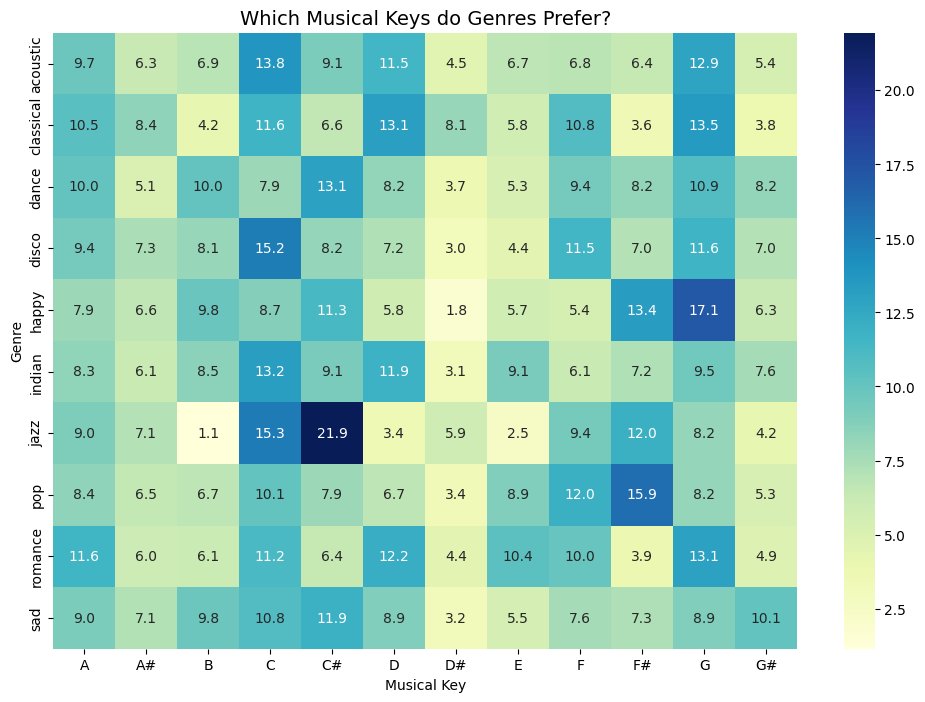

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))

sns.heatmap(key_genre_pct, annot=True, fmt=".1f", cmap="YlGnBu")

plt.title("Which Musical Keys do Genres Prefer?", fontsize=14)
plt.xlabel("Musical Key")
plt.ylabel("Genre")
plt.show()

In [3]:
# Chi-Square Test
chi2, p_val, dof, expected = chi2_contingency(key_genre_counts)

print(f"Mathematical Proof (P-Value): {p_val:.4e}")

Mathematical Proof (P-Value): 1.3327e-87
